In [21]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
import pandas as pd
import numpy as np

iris = load_iris()
data_df = pd.DataFrame(iris.data, columns=["A", "B", "C", "D"])
data_df.head()

,A,B,C,D
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
target_df = pd.DataFrame(iris.target)
target_df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [12]:
X = iris.data
y = iris.target

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled.mean(axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [19]:
lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

/home/nktech/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nktech/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


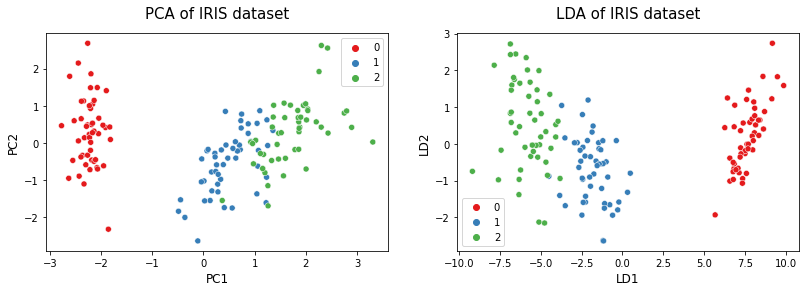

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5, 4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[1].set_title("LDA of IRIS dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("LD1", fontsize=12)
ax[1].set_ylabel("LD2", fontsize=12)
plt.savefig('PCA vs LDA.png', dpi=80)

/home/nktech/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


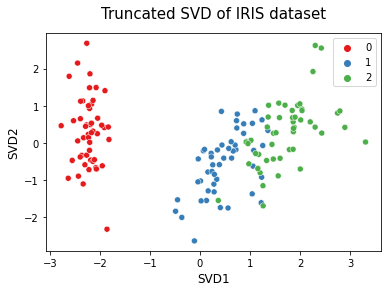

In [31]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6 ,4))
sns.scatterplot(X_svd[:,0], X_svd[:,1], hue=y, palette='Set1')
ax.set_title("Truncated SVD of IRIS dataset", fontsize=15, pad=15)
ax.set_xlabel("SVD1", fontsize=12)
ax.set_ylabel("SVD2", fontsize=12)
plt.savefig('SVD.png', dpi=100)

/home/nktech/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


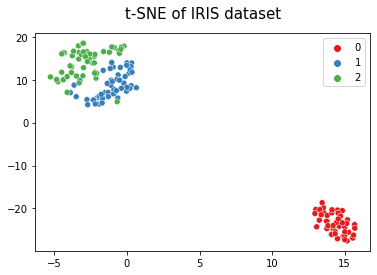

In [32]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-SNE of IRIS dataset", fontsize=15, pad=15)
plt.savefig('t-SNE.png')

/home/nktech/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


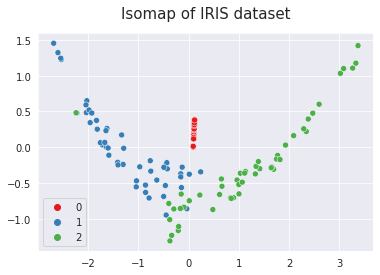

In [34]:
from sklearn.manifold import Isomap
isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

sns.set_style('darkgrid')
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=y, palette='Set1')
plt.title("Isomap of IRIS dataset", fontsize=15, pad=15)
plt.savefig('Isomap.png')

In [36]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

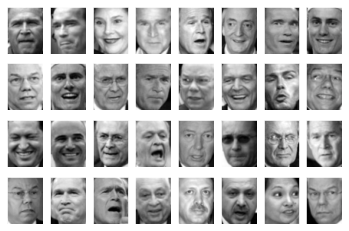

In [37]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

In [38]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [39]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

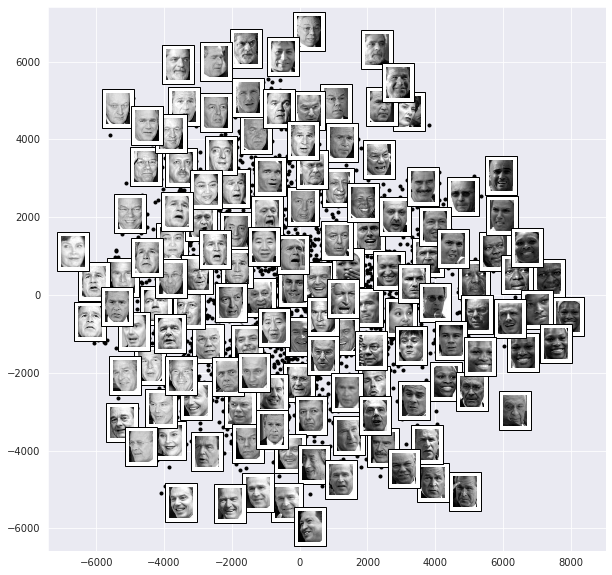

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

In [60]:
# Visualization
import plotly.express as px
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import LocallyLinearEmbedding as LLE

# Create a swiss roll
X, y = make_swiss_roll(n_samples=2000, noise=0.05)

# Make it thinner
X[:, 1] *= .5

# Create a flat addon to the top of the swiss roll
X_x=np.zeros((300,1))
X_y=np.random.uniform(low=0, high=10, size=(300,1))
X_z=np.random.uniform(low=14, high=25, size=(300,1))
X2=np.concatenate((X_x, X_y, X_z), axis=1)
y2=X_z.reshape(300)

# Concatenate swiss roll and flat rectangle arrays
X_two=np.concatenate((X, X2))
y_two=np.concatenate((y, y2))

In [42]:
# Create a 3D scatter plot
def Plot3D(X, y, plot_name):
    fig = px.scatter_3d(None, 
                        x=X[:,0], y=X[:,1], z=X[:,2],
                        color=y,
                        height=800, width=800
                       )
    # Update chart looks
    fig.update_layout(title_text=plot_name,
                      showlegend=False,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=1.75, z=1)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, 
                                  line=dict(color='black', width=0.1)))
    fig.update(layout_coloraxis_showscale=False)
    return fig
    
    
#----------------------------------------------      
# Create a 2D scatter plot
def Plot2D(X, y, plot_name):
    # Create a scatter plot
    fig = px.scatter(None, x=X[:,0], y=X[:,1], 
                     labels={
                         "x": "Dimension 1",
                         "y": "Dimension 2",
                     },
                     opacity=1, color=y)

    # Change chart background color
    fig.update_layout(dict(plot_bgcolor = 'white'))

    # Update axes lines
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                     showline=True, linewidth=1, linecolor='black')

    # Set figure title
    fig.update_layout(title_text=plot_name)

    # Update marker size
    fig.update_traces(marker=dict(size=5,
                                 line=dict(color='black', width=0.3)))
    return fig

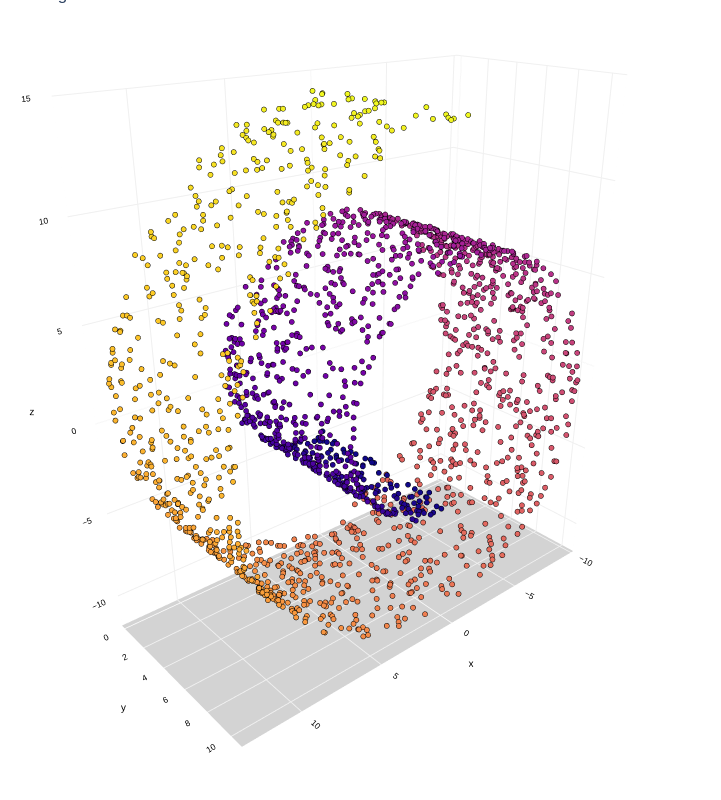

In [52]:
Plot3D(X, y, "Regular Swiss Roll")

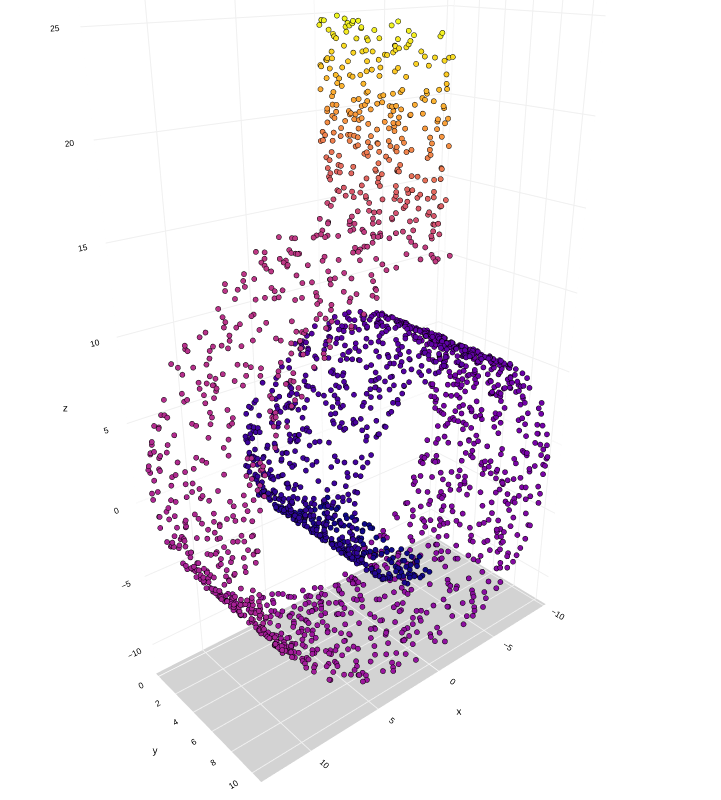

In [56]:
Plot3D(X_two, y_two, "Modified Swiss Roll")

### **Perform dimensionality reduction using LLE and Isomap embeddings**

In [46]:
# Function for performing LLE
def run_lle(num_neighbors, dims, mthd, data):
    # Specify LLE parameters
    embed_lle = LLE(n_neighbors=num_neighbors, # default=5, number of neighbors to consider for each point.
                    n_components=dims, # default=2, number of dimensions of the new space 
                    reg=0.001, # default=1e-3, regularization constant, multiplies the trace of the local covariance matrix of the distances.
                    eigen_solver='auto', # {‘auto’, ‘arpack’, ‘dense’}, default=’auto’, auto : algorithm will attempt to choose the best method for input data
                    #tol=1e-06, # default=1e-6, Tolerance for ‘arpack’ method. Not used if eigen_solver==’dense’.
                    #max_iter=100, # default=100, maximum number of iterations for the arpack solver. Not used if eigen_solver==’dense’.
                    method=mthd, # {‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}, default=’standard’
                    #hessian_tol=0.0001, # default=1e-4, Tolerance for Hessian eigenmapping method. Only used if method == 'hessian'
                    modified_tol=1e-12, # default=1e-12, Tolerance for modified LLE method. Only used if method == 'modified'
                    neighbors_algorithm='auto', # {‘auto’, ‘brute’, ‘kd_tree’, ‘ball_tree’}, default=’auto’, algorithm to use for nearest neighbors search, passed to neighbors.NearestNeighbors instance
                    random_state=42, # default=None, Determines the random number generator when eigen_solver == ‘arpack’. Pass an int for reproducible results across multiple function calls.
                    n_jobs=-1 # default=None, The number of parallel jobs to run. -1 means using all processors.
                   )
    # Fit and transofrm the data
    result = embed_lle.fit_transform(data)
    
    # Return results
    return result

## **Standard LLE on a regular swiss roll**

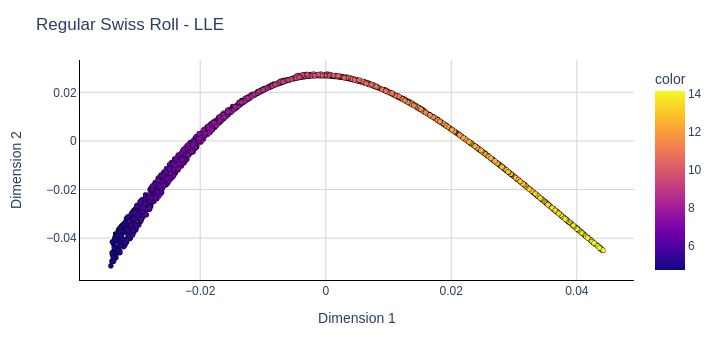

In [ ]:
std_lle_res=run_lle(num_neighbors=30, dims=2, mthd='standard', data=X)
Plot2D(std_lle_res, y, 'Regular Swiss Roll - LLE')

### **Modified LLE on a regular swiss roll**

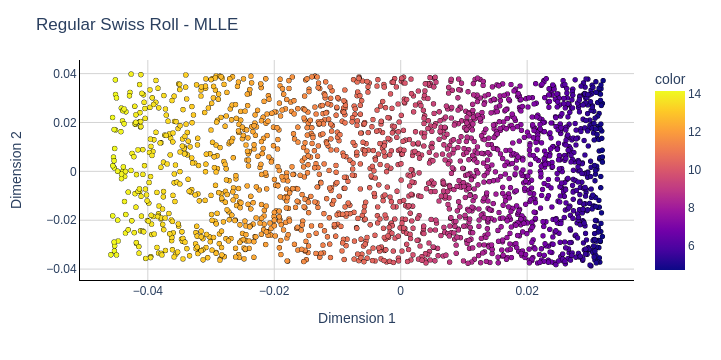

In [58]:
mlle_res=run_lle(num_neighbors=30, dims=2, mthd='modified', data=X)
Plot2D(mlle_res, y, 'Regular Swiss Roll - MLLE')

In [53]:
# Function for performing Isomap
def run_isomap(num_neighbors, dims, data):
    # Specify Isomap parameters
    embed_isomap = Isomap(n_neighbors=num_neighbors, n_components=dims, n_jobs=-1)
    
    # Fit and transofrm the data
    result = embed_isomap.fit_transform(data)
    
    # Return results
    return result

In [54]:
# Isomap on a regular swiss roll
isomap_res=run_isomap(num_neighbors=30, dims=2, data=X)

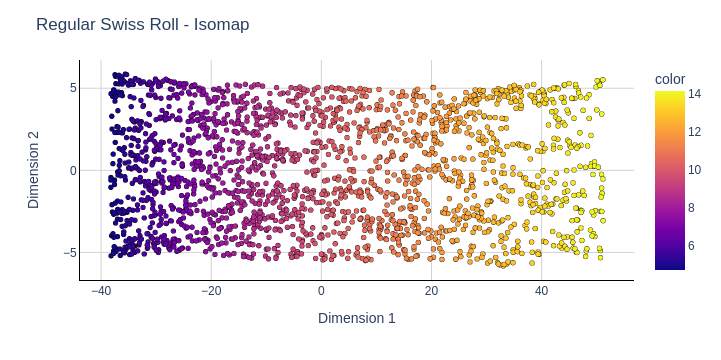

In [55]:
Plot2D(isomap_res, y, 'Regular Swiss Roll - Isomap')